In [1]:
library(performance)
library(ggplot2)
library(dplyr)
library(rstatix)
library(ggpubr)
library(ggbreak)

Warning message:
“package ‘performance’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘rstatix’ was built under R version 4.3.3”

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Warning message:
“package ‘ggbreak’ was built under R version 4.3.3”
ggbreak v0.1.4 Learn more at https://yulab-smu.top/



If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846




# Reading input

In [2]:
df<-read.csv("10_Isotype_MSD/Isotype_Singal_IgG2_IgG3_Phuket.csv")

In [3]:
df<-df %>% filter(Flu_Year=="2020-2021",Flu_Day=="Day_7")

In [4]:
df<-df %>% mutate(AgeGroup= case_when(cohort.cohortGuid=="BR1"~"Young", TRUE ~"Older"))

In [5]:
df$Group <- paste0(df$`AgeGroup`, "_", df$Flu_Day)
df$Group <- factor(df$Group, levels = c(
    "Young_Day_7", "Older_Day_7"))

# Plotting

In [8]:
table(df$AgeGroup,df$Isotype)

       
        IgG2 IgG3
  Older   14   15
  Young   10   10

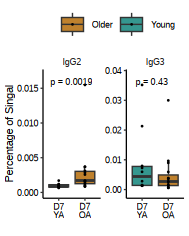

In [6]:
options(repr.plot.width = 20, repr.plot.height = 8)


p <- ggplot(df %>%
    arrange(subjectGuid, Flu_Day), aes(x = Group, y = Isotype_to_Total_Singal_Ratio, 
                                       fill = `AgeGroup`)) +
    geom_boxplot(outlier.shape = NA, lwd = 0.3) +
    geom_point(color = "black", size = 0.5, stroke = 0) +
    theme_classic(base_size = 6) +
    scale_fill_manual(values = c(Older = "#bf812d", 
                                 Young = "#35978f")) +
    xlab("") +
    ylab("Percentage of Singal") +
    scale_y_continuous(expand = expansion(mult = c(0.1, 0.15))) +

    scale_x_discrete(labels = c(
        Older_Day_7 = "D7\nOA", 
        Young_Day_7 = "D7\nYA"
    )) +
    theme(
        legend.position = "top", legend.title = element_blank(), axis.line = element_line(colour = "black"), 
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.border = element_blank(), panel.background = element_blank(), 
        strip.background = element_rect(linewidth = 0), 
        axis.title.x = element_text(margin = margin(t = 1))
    ) +
    stat_compare_means( size = 1.76, label = "p.format",bracket.size = 0.2)+ theme(
  axis.title   = element_text(color = "black"),
  axis.text    = element_text(color = "black")
)+facet_wrap(~Isotype,scale="free_y")
options(repr.plot.width = 40/25.4, repr.plot.height = 50/25.4)

p
ggsave('FigureM.pdf', p, 
       width = 40/25.4, 
       height = 50/25.4)